<a href="https://colab.research.google.com/github/iamBehzad/Five-Project-Advanced-Deep-Learning-Low-Level-Modeling/blob/main/Project04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import time

In [ ]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

# Select only images and labels corresponding to classes 0, 2, and 5
keep_classes = np.isin(train_labels, [0, 2, 5])
x_train = train_images[keep_classes]
y_train = train_labels[keep_classes]
y_train[y_train == 0] = 0
y_train[y_train == 2] = 1
y_train[y_train == 5] = 2

keep_classes = np.isin(test_labels, [0, 2, 5])
x_test = test_images[keep_classes]
y_test = test_labels[keep_classes]
y_test[y_test == 0] = 0
y_test[y_test == 2] = 1
y_test[y_test == 5] = 2

# Normalize pixel values
x_train, x_test = x_train/255.0 , x_test/255.0

print("x_train.shape = ", x_train.shape)
print("y_train.shape = ", y_train.shape)
print("x_test.shape = ", x_test.shape)
print("y_test.shape = " , y_test.shape)

x_train.shape =  (17302, 28, 28)
y_train.shape =  (17302,)
x_test.shape =  (2904, 28, 28)
y_test.shape =  (2904,)


In [ ]:
usual_model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.Flatten(),
        layers.Dropout(0.4),
        layers.Dense(3, activation="softmax")        
    ]
)

usual_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
usual_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 36864)             0         
                                                                 
 dropout (Dropout)           (None, 36864)             0         
                                                                 
 dense (Dense)               (None, 3)                 110595    
                                                                 
Total params: 129,411
Trainable params: 129,411
Non-trainable params: 0
_________________________________________________________________


In [ ]:
start_time = time.time()
usual_model_history = usual_model.fit(x_train, y_train, epochs=100, validation_split=0.1)
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/100
487/487 [==============================] - 4s 5ms/step - loss: 0.0496 - accuracy: 0.9831 - val_loss: 0.0212 - val_accuracy: 0.9936
Epoch 2/100
487/487 [==============================] - 2s 5ms/step - loss: 0.0100 - accuracy: 0.9962 - val_loss: 0.0202 - val_accuracy: 0.9942
Epoch 3/100
487/487 [==============================] - 2s 5ms/step - loss: 0.0052 - accuracy: 0.9981 - val_loss: 0.0178 - val_accuracy: 0.9960
Epoch 4/100
487/487 [==============================] - 2s 4ms/step - loss: 0.0058 - accuracy: 0.9979 - val_loss: 0.0284 - val_accuracy: 0.9936
Epoch 5/100
487/487 [==============================] - 2s 4ms/step - loss: 0.0043 - accuracy: 0.9983 - val_loss: 0.0121 - val_accuracy: 0.9960
Epoch 6/100
487/487 [==============================] - 2s 4ms/step - loss: 0.0028 - accuracy: 0.9990 - val_loss: 0.0158 - val_accuracy: 0.9960
Epoch 7/100
487/487 [==============================] - 2s 4ms/step - loss: 0.0010 - accuracy: 0.9996 - val_loss: 0.0225 - val_accuracy: 0.9965

In [ ]:
# Create a new convolutional layer
def new_conv_layer(input_data):
    conv1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_data)
    conv2 = layers.Conv2D(32, (5, 5), activation='relu', padding='same')(input_data)
    concat = layers.Concatenate()([conv1, conv2])
    return concat

In [ ]:
def build_model():
    inputs = keras.Input(shape=(28, 28, 1))
    x = new_conv_layer(inputs)
    x = new_conv_layer(inputs)
    x = layers.Flatten()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(3, activation="softmax")(x)
    return keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
new_conv_layer_model = build_model()

new_conv_layer_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
new_conv_layer_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_12 (Conv2D)             (None, 28, 28, 32)   320         ['input_4[0][0]']                
                                                                                                  
 conv2d_13 (Conv2D)             (None, 28, 28, 32)   832         ['input_4[0][0]']                
                                                                                                  
 concatenate_5 (Concatenate)    (None, 28, 28, 64)   0           ['conv2d_12[0][0]',              
                                                                  'conv2d_13[0][0]']        

In [ ]:
start_time = time.time()
new_conv_layer_model_history = new_conv_layer_model.fit(x_train, y_train, epochs=100, validation_split=0.1)
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/100
487/487 [==============================] - 4s 5ms/step - loss: 0.0562 - accuracy: 0.9809 - val_loss: 0.0236 - val_accuracy: 0.9936
Epoch 2/100
487/487 [==============================] - 2s 4ms/step - loss: 0.0118 - accuracy: 0.9963 - val_loss: 0.0223 - val_accuracy: 0.9913
Epoch 3/100
487/487 [==============================] - 2s 4ms/step - loss: 0.0056 - accuracy: 0.9987 - val_loss: 0.0220 - val_accuracy: 0.9960
Epoch 4/100
487/487 [==============================] - 2s 4ms/step - loss: 0.0043 - accuracy: 0.9989 - val_loss: 0.0277 - val_accuracy: 0.9960
Epoch 5/100
487/487 [==============================] - 2s 4ms/step - loss: 0.0029 - accuracy: 0.9992 - val_loss: 0.0222 - val_accuracy: 0.9925
Epoch 6/100
487/487 [==============================] - 2s 4ms/step - loss: 9.5683e-04 - accuracy: 0.9998 - val_loss: 0.0277 - val_accuracy: 0.9960
Epoch 7/100
487/487 [==============================] - 2s 5ms/step - loss: 0.0039 - accuracy: 0.9985 - val_loss: 0.0299 - val_accuracy: 0.

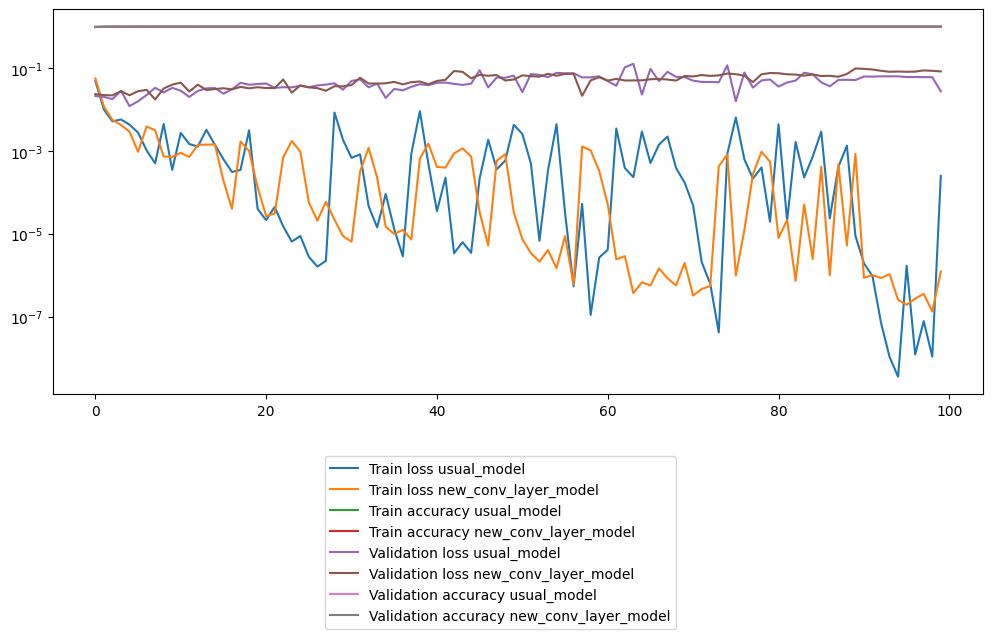

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.set_yscale('log')
ax.plot(usual_model_history.history['loss'], label='Train loss usual_model')
ax.plot(new_conv_layer_model_history.history['loss'], label='Train loss new_conv_layer_model')

ax.plot(usual_model_history.history['accuracy'], label='Train accuracy usual_model')
ax.plot(new_conv_layer_model_history.history['accuracy'], label='Train accuracy new_conv_layer_model')

ax.plot(usual_model_history.history['val_loss'], label='Validation loss usual_model')
ax.plot(new_conv_layer_model_history.history['val_loss'], label='Validation loss new_conv_layer_model')

ax.plot(usual_model_history.history['val_accuracy'], label='Validation accuracy usual_model')
ax.plot(new_conv_layer_model_history.history['val_accuracy'], label='Validation accuracy new_conv_layer_model')

fig.legend(bbox_to_anchor=[0.65, 0.0]);

In [ ]:
# evaluate the model
usual_model.evaluate(x_test, y_test, verbose=0 ,  return_dict=True )

{'loss': 0.03423697128891945, 'accuracy': 0.997245192527771}

In [ ]:
# evaluate the model
new_conv_layer_model.evaluate(x_test, y_test, verbose=0 ,  return_dict=True )

{'loss': 0.02845514379441738, 'accuracy': 0.9979338645935059}